In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import entropy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
np.set_printoptions(suppress=True)

In [4]:
raw_data = np.genfromtxt('traffic_moscow.csv', delimiter=',')

n_areas = int(np.max(raw_data[:, 0]))
correspondence_matrix = np.full(
            (n_areas, n_areas), np.nan, dtype=np.double
)
T = np.full(
    (n_areas, n_areas), np.nan, dtype=np.double
)
amt = np.full(
    (n_areas, n_areas), np.nan, dtype=np.double
)
for raw_data_line in raw_data:
    i, j = int(raw_data_line[0]) - 1, int(raw_data_line[1]) - 1
    correspondence_matrix[i, j] = raw_data_line[2]
    T[i, j] = raw_data_line[3]
    amt[i, j] = raw_data_line[4]
    
L = np.nansum(correspondence_matrix, axis=1),
W = np.nansum(correspondence_matrix, axis=0)

people_num = np.nansum(L)
L = L / np.nansum(L)
W = W / np.nansum(W)

In [21]:
def Sinkhorn(k, beta, alpha, lambda_W_prev, lambda_L_prev):    
    lambda_L = np.zeros((n, ), dtype=float)
    lambda_W = np.zeros((n, ), dtype=float)
    
    if k % 2 == 0:
        lambda_W = lambda_W_prev
        lambda_L = np.log(np.nansum(
            (np.exp(-lambda_W_prev - 1 - cost_matrix)).T 
            / L, axis = 0
            ))
    else:
        lambda_L = lambda_L_prev
        lambda_W = np.log(np.nansum(
            (np.exp(-lambda_L - 1 - cost_matrix.T)).T
            / W, axis=0
            ))
        
    return lambda_W, lambda_L

def iterate(beta, alpha, L, W, num_iter, eps):
    
    lambda_L = np.zeros((n, ), dtype=float)
    lambda_W = np.zeros((n, ), dtype=float)
    
    for k in range(num_iter):
        
        lambda_Wn, lambda_Ln = Sinkhorn(k, beta, alpha, lambda_W, lambda_L)
        
        delta = np.linalg.norm(np.concatenate((lambda_Ln - lambda_L, 
                                               lambda_Wn - lambda_W)))
        
        lambda_L, lambda_W = lambda_Ln, lambda_Wn 
        
        if delta < eps:
            break
    
    r = error_d_i_j(lambda_Ln, lambda_Wn, beta, alpha)
    return r

def error_d_i_j(lambda_L, lambda_W, beta, alpha):
    er = np.exp( -1 - cost_matrix - (np.reshape(lambda_L, (22, 1)) + lambda_W))
    return er * people_num

In [33]:
n = 22
num_iter = 1000
alpha, beta = 1.0, 1.0
beta_range = np.arange(0.0, 0.5, 0.0001)
cost_matrix = T * beta * alpha

res_list = []

for beta in beta_range:
    cost_matrix = T * beta * alpha
    rec = iterate(beta, alpha, L, W, num_iter, eps=10**(-4))
    res_list.append(np.linalg.norm(np.nan_to_num(rec, nan = 0.0) 
                                                 - np.nan_to_num(correspondence_matrix, nan=0.0)))

In [34]:
np.min(res_list), res_list.index(np.min(res_list)), beta_range[res_list.index(np.min(res_list))]

(85.9518502502735, 763, 0.0763)

In [42]:
best_alpha = beta_range[res_list.index(np.min(res_list))]
best_cor_matrix = iterate(beta, best_alpha, L, W, num_iter, eps=10**(-4))

In [36]:
res_list[0] - res_list[res_list.index(np.min(res_list))]

138.3150006032647

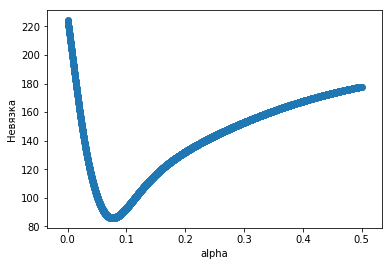

In [38]:
plt.ticklabel_format(useOffset=False)

plt.scatter(beta_range, res_list)
plt.ylabel('Невязка')
plt.xlabel('alpha')
plt.show()